In [23]:
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score

## Fetching data from sklearn openml

In [2]:
mnist = fetch_openml('mnist_784', version = 1)
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [4]:
X, y = mnist['data'], mnist['target']
y =y.astype(np.uint8)
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


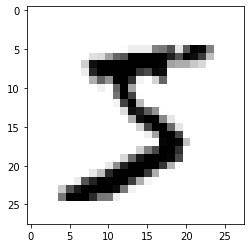

In [5]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = "binary")
plt.show()

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
print(y_train)

[5 0 4 ... 5 6 8]


## Binary Classifier
* SGDClassifier
* confusion_matrix
* recall, precision, threshold, f1 score

In [7]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [8]:
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [9]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [10]:
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [11]:
print(f1_score(y_train_5, y_train_pred,  average='micro'))
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3,method = "decision_function")
print(y_scores)

0.9570333333333333
[  1200.93051237 -26883.79202424 -33072.03475406 ...  13272.12718981
  -7258.47203373 -16877.50840447]


In [12]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
def plot_precision_recall_vs_thresh(precisions,recalls,thresh):
    plt.plot(thresh, precisions[:-1], "b--", label="Precision")
    plt.plot(thresh, recalls[:-1], "g-", label="Recall")
    plt.xlabel("thresh")
    plt.legend()
def plot_precision_vs_recall(precisions,recalls):
    plt.plot(precisions[:-1], recalls[:-1])
    plt.xlabel("recall")
    plt.ylabel("precision")

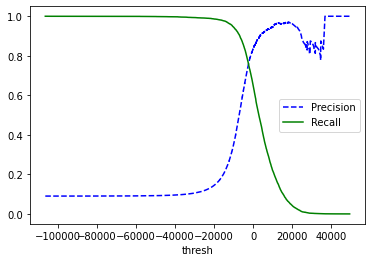

In [13]:
plot_precision_recall_vs_thresh(precisions, recalls, thresholds)

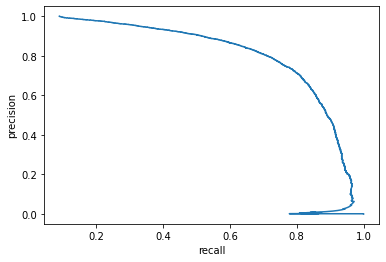

In [14]:
plot_precision_vs_recall(precisions,recalls)

In [16]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


In [19]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
precision_score(y_train_5, y_train_pred_90)
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

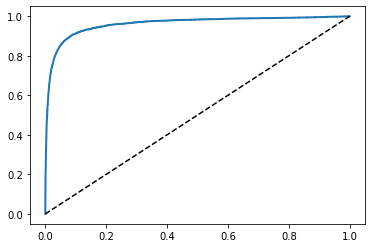

In [21]:
fpr, tpr, thresholds = roc_curve(y_train_5,y_scores)
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr, linewidth = 2, label = None)
    plt.plot([0,1],[0,1], 'k--')
plot_roc_curve(fpr,tpr)

In [24]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616